We begin each chapter by importing Sympy and other necessary libraries.

In [16]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display
sp.init_printing(use_latex='mathjax')

# Perturbation Theory

In broad strokes, the objective of perturbation theory is to bridge the gap between a simple problem to a harder problem by means of a continuous parameter change. In more mathematical language, we have a problem $P(x;\epsilon)$ for which $P(x;0)$ has a simple solution, our objective is to understand how a solution $x$ depends on $\epsilon$ in the limit $\epsilon\to0$.

Sometimes a problem depends on a large parameter $E$ whose solution is known as $E\to\infty$. This can be recast into the above case by considering $\epsilon = \frac 1E$.

## Polynomial Examples

### Regular Perturbation
We begin by consider the polynomial equation $x^6 + \epsilon x - 1 = 0.$ Here we define the polynomial

In [2]:
x, epsilon = sp.symbols("x epsilon")
poly = x**6 + epsilon*x - 1
display(poly)

       6    
ε⋅x + x  - 1

We look for a solution of the form $X\approx x_0 + \epsilon x_1 + \epsilon^2 x_2 + \epsilon^3 x_3 + O(\epsilon^4).$ Big O notation is used to describe the behavior of functions in a limit (here $\epsilon\to0$) in a simple manner. This will be defined formally later. This code defines the series solution, and then substitutes it into the polynomial.

In [3]:
N = 4
x_ = [sp.symbols(f'x_{i}') for i in range(N)]
X = sum([epsilon**i * x_[i] for i in range(N)])
poly_expand = sp.expand(poly.subs({x:X})) #+ sp.Order(epsilon**N)
display(poly_expand)

 18   6      17      5      16      5       16   2   4      15      5       15 ↪
ε  ⋅x₃  + 6⋅ε  ⋅x₂⋅x₃  + 6⋅ε  ⋅x₁⋅x₃  + 15⋅ε  ⋅x₂ ⋅x₃  + 6⋅ε  ⋅x₀⋅x₃  + 30⋅ε   ↪

↪          4       15   3   3       14         4       14   2   4       14     ↪
↪ ⋅x₁⋅x₂⋅x₃  + 20⋅ε  ⋅x₂ ⋅x₃  + 30⋅ε  ⋅x₀⋅x₂⋅x₃  + 15⋅ε  ⋅x₁ ⋅x₃  + 60⋅ε  ⋅x₁⋅ ↪

↪   2   3       14   4   2       13         4       13      2   3       13   2 ↪
↪ x₂ ⋅x₃  + 15⋅ε  ⋅x₂ ⋅x₃  + 30⋅ε  ⋅x₀⋅x₁⋅x₃  + 60⋅ε  ⋅x₀⋅x₂ ⋅x₃  + 60⋅ε  ⋅x₁  ↪

↪       3       13      3   2      13   5          12   2   4        12        ↪
↪ ⋅x₂⋅x₃  + 60⋅ε  ⋅x₁⋅x₂ ⋅x₃  + 6⋅ε  ⋅x₂ ⋅x₃ + 15⋅ε  ⋅x₀ ⋅x₃  + 120⋅ε  ⋅x₀⋅x₁⋅ ↪

↪      3       12      3   2       12   3   3       12   2   2   2       12    ↪
↪ x₂⋅x₃  + 60⋅ε  ⋅x₀⋅x₂ ⋅x₃  + 20⋅ε  ⋅x₁ ⋅x₃  + 90⋅ε  ⋅x₁ ⋅x₂ ⋅x₃  + 30⋅ε  ⋅x₁ ↪

↪    4       12   6       11   2      3       11      2   3        11          ↪
↪ ⋅x₂ ⋅x₃ + ε  ⋅x₂  + 60⋅ε  ⋅x₀ ⋅x₂⋅x₃  + 60⋅ε  ⋅x₀⋅x₁ ⋅x₃  + 180⋅ε  ⋅x₀⋅x₁⋅x₂ ↪

↪ 2   2       11      

The previous code spits out a whole lot of terms. As it turns out, we only need the first few to build our asymptotic expansion. To just see these terms, remove the comment in the above code.

As such, if solutions for the $x_i$ variables can be found to cancel out these leading terms, then the solution is accurate up to $O(\epsilon^N)$. Therefore, we use Sympy to identify the terms at each order, which must be found to vanish.

In [4]:
dropO = lambda s: sp.sympify(str(s).replace('O','0 *'))
poly_expand = dropO(poly_expand)

expansion_terms = poly_expand.collect(epsilon,evaluate=False)

eqns = []
for n in range(N):
    eqns.append(expansion_terms[epsilon**n])
    display(eqns[n])

  6    
x₀  - 1

    5        
6⋅x₀ ⋅x₁ + x₀

    5           4   2     
6⋅x₀ ⋅x₂ + 15⋅x₀ ⋅x₁  + x₁

    5           4              3   3     
6⋅x₀ ⋅x₃ + 30⋅x₀ ⋅x₁⋅x₂ + 20⋅x₀ ⋅x₁  + x₂

The following block of codes solves for the coefficients, then builds out the asymptotic expansions.

In [5]:
#solve coefficients
expansions = [{x_[0]:i} for i in sp.solve(eqns[0],x_[0])]
for expansion in expansions:
    for n in range(1,N):
        expansion[x_[n]] = sp.solve(eqns[n].subs(expansion),x_[n])[0]
#build out expansions     
expansions = [X.subs(expansion) for expansion in expansions]
for expansion in expansions:
    display(expansion)

   3    2        
  ε    ε    ε    
- ── + ── - ─ - 1
  81   24   6    

   3    2        
  ε    ε    ε    
- ── - ── - ─ + 1
  81   24   6    

                   2                        
 3 ⎛ 1    √3⋅ⅈ⎞   ε       ⅈ⋅ε       1   √3⋅ⅈ
ε ⋅⎜─── + ────⎟ - ── - ────────── - ─ - ────
   ⎝162   162 ⎠   24   3⋅√3 - 3⋅ⅈ   2    2  

                   2                        
 3 ⎛ 1    √3⋅ⅈ⎞   ε       ⅈ⋅ε       1   √3⋅ⅈ
ε ⋅⎜─── - ────⎟ - ── + ────────── - ─ + ────
   ⎝162   162 ⎠   24   3⋅(√3 + ⅈ)   2    2  

                   2                        
 3 ⎛ 1    √3⋅ⅈ⎞   ε       ⅈ⋅ε       1   √3⋅ⅈ
ε ⋅⎜─── - ────⎟ + ── + ────────── + ─ - ────
   ⎝162   162 ⎠   24   3⋅(√3 + ⅈ)   2    2  

                   2                        
 3 ⎛ 1    √3⋅ⅈ⎞   ε       ⅈ⋅ε       1   √3⋅ⅈ
ε ⋅⎜─── + ────⎟ + ── - ────────── + ─ + ────
   ⎝162   162 ⎠   24   3⋅√3 - 3⋅ⅈ   2    2  

In the unperturbed case, we know that $x^6 - 1 = 0$ has solutions of the sixth roots of unity, which we see are the dominant terms of the expansion.

This latter code does much of the same as above, but then plugs in an actual $\epsilon$ value (`eps_actual` below), and shows how successive approximations will converge to the real solution to the polynomial (found here using a generic numerical method).

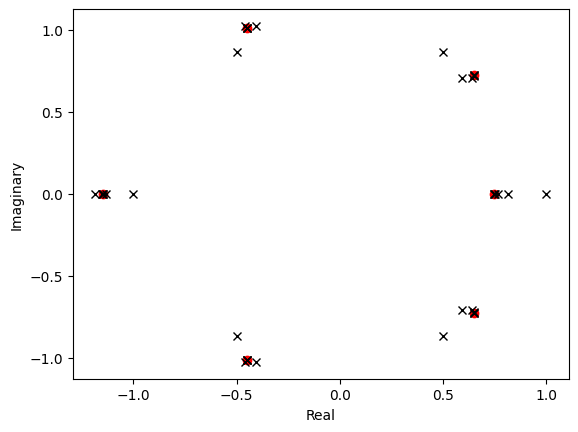

In [15]:
def produceExpansions(poly,x,epsilon,N):
    x_ = [sp.symbols(f'x_{i}') for i in range(N)]
    X = sum([epsilon**i * x_[i] for i in range(N)])
    poly_expand = sp.expand(poly.subs({x:X}))

    eqns = [poly_expand.coeff(epsilon,n) for n in range(N)]
    
    #solve coefficients
    expansions = [{x_[0]:i} for i in sp.solve(eqns[0],x_[0])]
    for expansion in expansions:
        for n in range(1,N):
            expansion[x_[n]] = sp.solve(eqns[n].subs(expansion),x_[n])[0]
    #build out expansions     
    return [X.subs(expansion) for expansion in expansions]

def numericSolver(polynomial,x,epsilon,eps_actual):
    poly_actual = polynomial.subs({epsilon:eps_actual})
    return sp.solve(poly_actual,x)

eps_actual = 1.1

roots = np.array(numericSolver(poly,x,epsilon,eps_actual)).astype(complex)
for root in roots:
    plt.plot(root.real,root.imag,'ro')

for n in range(1,7):
    roots = np.array(produceExpansions(poly,x,epsilon,n))
    for root in roots:
        z = complex(root.subs(epsilon,eps_actual))
        plt.plot(z.real,z.imag,'kx')

plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.show()

This code produces just the expansions, without evaluation.

### Singular Perturbation

Now we consider the polynomial $\epsilon x^6 + x - 1 = 0.$ In the situation where $\epsilon=0,$ the polynomial has one solution, whereas the perturbed solutions have six solutions. This qualitative difference is an example of a *singular perturbation,* which broadly refers to scenarios where the limit $\epsilon\to0$ does not approach the behavior at 0. The following code the expansion of that one solution.

In [59]:
poly_singular = epsilon*x**6 + x - 1

display(produceExpansions(poly_singular,x,epsilon,4))

⎡      3      2        ⎤
⎣- 51⋅ε  + 6⋅ε  - ε + 1⎦

As $\epsilon\to0$ solutions to this polynomial display unbounded growth. To find these solution, we must introduce a scaled variable $x = y/\delta$

In [9]:
y,delta = sp.symbols('y delta')
display(poly_singular.subs({x:y/delta}))

            6
     y   ε⋅y 
-1 + ─ + ────
     δ     6 
          δ  


For this scaling to be useful we must choose a $\delta$ such that
- There are multiple terms of highest order
- This is no longer a singular perturbation

The first requirement tells us that either $\delta = 1, \epsilon^{1/5}.$ However, only the latter eliminates the singular perturbation, now producing the equation $y^6 + y - \epsilon^{1/5} = 0.$

As such, we will solve this new problem in much the same way as before, but now with the asymptotic series $y\approx y_0 + y_1\epsilon^{1/5} + y_2\epsilon^{2/5} + y_3\epsilon^{3/5} + O(\epsilon^{4/5})$

In [10]:
scale = epsilon**sp.Rational(1,5)
poly_singular_mod = (poly_singular.subs({x:y/scale})*scale).expand().powsimp()

expansions = produceExpansions(poly_singular_mod,y,scale,4)
for expansion in expansions:
    expansion = (expansion/scale).expand().powsimp() #return to x
    display(expansion)

      2/5     5 ___            
  14⋅ε      3⋅╲╱ ε    1     1  
- ─────── + ─────── - ─ - ─────
    125       25      5   5 ___
                          ╲╱ ε 

1

                                                                               ↪
                                                                               ↪
        2/5      2/5      2/5   ____________      2/5   _____________        5 ↪
  7⋅√5⋅ε      7⋅ε      7⋅ε   ⋅╲╱ -10 + 2⋅√5    7⋅ε   ⋅╲╱ -50 + 10⋅√5    3⋅√5⋅╲ ↪
- ───────── + ────── + ───────────────────── + ────────────────────── - ────── ↪
     250       250              500                     500                100 ↪
                                                                               ↪

↪                                                                       ______ ↪
↪                                                                      ╱   5   ↪
↪  ___     5 ___     5 ___   ____________                             ╱  - ─ + ↪
↪ ╱ ε    3⋅╲╱ ε    3⋅╲╱ ε ⋅╲╱ -10 + 2⋅√5    1      1        √5      ╲╱     8   ↪
↪ ──── - ─────── + ────────────────────── - ─ + ─────── + ─────── + ────────── ↪
↪          100             

                                                                               ↪
                                                                               ↪
   2/5         2/5      2/5   ____________     5 ___        5 ___     5 ___    ↪
7⋅ε      7⋅√5⋅ε      7⋅ε   ⋅╲╱ -10 + 2⋅√5    3⋅╲╱ ε    3⋅√5⋅╲╱ ε    3⋅╲╱ ε ⋅╲╱ ↪
────── + ───────── + ───────────────────── - ─────── + ────────── - ────────── ↪
 250        250               250              100        100                  ↪
                                                                               ↪

↪                                                                      _______ ↪
↪                                                                     ╱   25   ↪
↪ _____________     5 ___   ____________                             ╱  - ── + ↪
↪  -50 + 10⋅√5    3⋅╲╱ ε ⋅╲╱ -10 + 2⋅√5    1     √5         1      ╲╱     8    ↪
↪ ───────────── - ────────────────────── - ─ - ─────── + ─────── - ─────────── ↪
↪ 200                      

                                                                               ↪
                                                                               ↪
        2/5      2/5       2/5   ____________    2/5   _____________    2/5    ↪
  7⋅√5⋅ε      7⋅ε      21⋅ε   ⋅╲╱ -10 - 2⋅√5    ε   ⋅╲╱ -50 - 10⋅√5    ε   ⋅╲╱ ↪
- ───────── + ────── - ────────────────────── - ──────────────────── - ─────── ↪
     250       250              1000                    500                    ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ _____________      2/5   ____________        5 ___     5 ___     5 ___   ___ ↪
↪  -50 + 10⋅√5    3⋅ε   ⋅╲╱ -10 + 2⋅√5    3⋅√5⋅╲╱ ε    3⋅╲╱ ε    3⋅╲╱ ε ⋅╲╱ -5 ↪
↪ ───────────── + ───────────────────── - ────────── - ─────── - ───────────── ↪
↪  400                    2

                                                                               ↪
                                                                               ↪
   2/5         2/5       2/5   ____________    2/5   _____________      2/5    ↪
7⋅ε      7⋅√5⋅ε      21⋅ε   ⋅╲╱ -10 + 2⋅√5    ε   ⋅╲╱ -50 - 10⋅√5    3⋅ε   ⋅╲╱ ↪
────── + ───────── - ────────────────────── - ──────────────────── - ───────── ↪
 250        250               1000                    400                    2 ↪
                                                                               ↪

↪                                                                              ↪
↪                                                                              ↪
↪ ____________    2/5   _____________     5 ___        5 ___     5 ___   _____ ↪
↪  -10 - 2⋅√5    ε   ⋅╲╱ -50 + 10⋅√5    3⋅╲╱ ε    3⋅√5⋅╲╱ ε    3⋅╲╱ ε ⋅╲╱ -10  ↪
↪ ──────────── + ──────────────────── - ─────── + ────────── - ─────────────── ↪
↪ 000                    50

A few caveats to the above code are worth noting

- The supplied algorithm of works when the leading order term of the expansion at scale is $O(1)$ with subdominant terms being integer powers of some $\epsilon^\alpha.$ While this is often true, it is not always, as will be discussed later.
- After the expansion in $y$ is produced, it must be returned to an expansion in $x$, which is done in the commented line

Another example to consider is $(1-\epsilon)x^2 - 2x + 1 = 0.$ Here the unperturbed solution has a single, repeated root, whereas the singular perturbations splits that into two simple solutions. In this case, rescaling is not necessary; it suffices to consider a series of the form $x\approx x_0 + x_1\epsilon^{1/2} + x_2\epsilon + O(\epsilon^{3/2})$

Since the leading order of both solutions is $1$ the code has been refactored to branch at the next step

In [30]:
poly_double = (1-epsilon)*x**2 - 2*x + 1

N = 5
scale = epsilon**sp.Rational(1,2)
x_ = [sp.symbols(f'x_{i}') for i in range(N)]
X = sum([scale**i * x_[i] for i in range(N)])
poly_expand = sp.expand(poly_double.subs({x:X}))
expansion_terms = poly_expand.collect(epsilon,evaluate=False)

eqns = [expansion_terms[scale**n] for n in range(N+1)]
#solve coefficients
lead_soln = sp.solve(eqns[0],x_[0])[0]
#display(sp.solve(eqns[1].subs(replacements),x_[1]))
expansions = [{x_[0]:lead_soln, x_[1]:i} for i in sp.solve(eqns[2].subs(x_[0],lead_soln),x_[1])]
for expansion in expansions:
    for n in range(2,N):
        expansion[x_[n]] = sp.solve(eqns[n+1].subs(expansion),x_[n])[0]

display(expansions)
#build out expansions     
expansions = [X.subs(expansion) for expansion in expansions]
display(expansions)


[{x₀: 1, x₁: -1, x₂: 1, x₃: -1, x₄: 1}, {x₀: 1, x₁: 1, x₂: 1, x₃: 1, x₄: 1}]

⎡   3/2         2           3/2         2        ⎤
⎣- ε    - √ε + ε  + ε + 1, ε    + √ε + ε  + ε + 1⎦